# Task 1: Convolution
To finish the task, one thing to do is to generate the masks/ filters. In particular, for the generation of Haar-like filters, different sizes must be taken into consideration.Another thing to do is to build a function that can do a 2D convolution of a filter and an image. The final step is to call the convolution function with the image and different filters as the parameters.

In [66]:
import numpy as np
import cv2
def convolute(image, filter):
    imageSizeX = image.shape[0]
    imageSizeY = image.shape[1]
    filterSizeX = filter.shape[0]
    filterSizeY = filter.shape[1]
    outputSizeX = imageSizeX
    outputSizeY = imageSizeY
    output = output = np.zeros((outputSizeX, outputSizeY))
    # Go through all the positions. For a fixed posirion, apply the filter (stick the filter on the image from the position),
    for posX in range(0, imageSizeX-filterSizeX+1):
        for posY in range(0, imageSizeY-filterSizeY+1):
            # Local Convolution: Then use index i and j to visit filter(i, j) and image(posX+i, posY+j), multiply and sum to F
            F=0
            for i in range(0, filterSizeX):
                for j in range(0, filterSizeY):
                    F+=filter[i][j]*image[posX+i][posY+j]
            outputPosX = int(posX+filterSizeX/2)
            outputPosY = int(posY+filterSizeY/2)
            if (outputPosX < outputSizeX and outputPosY < outputSizeY):
                output[outputPosX][outputPosY] = F
            # Give F to a position on the output 
    return output

[[ 0.  0.]
 [ 0. -6.]]
[[ 0.  0.  0.]
 [ 0. -6. -1.]
 [ 0.  3.  1.]]
[[ 0.  0.  0.]
 [ 0. -6. -1.]
 [ 0.  3.  1.]
 [ 0.  5. -4.]]
[[0. 2. 0.]
 [0. 9. 0.]
 [0. 5. 0.]
 [0. 4. 0.]]


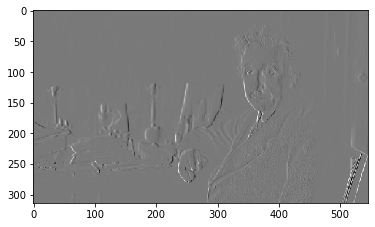

In [70]:
# testing block:
image=np.array([[0,1],[3,10]])
filter = np.array([[-1,1],[1,-1]])
print(convolute(image, filter))
image1=np.array([[0,1,2],[3,10,12],[4,8,9]])
print(convolute(image1, filter))
image2=np.array([[0,1,2],[3,10,12],[4,8,9],[1,0,5]])
print(convolute(image2, filter))
filter1 = np.array([[-1,0,1]])
print(convolute(image2, filter1))
filter2 = np.array([[-1,1]])

from PIL import Image
from pylab import *
image3 = np.array(Image.open('einstein.png').convert('L'),'f')
# image3 = cv2.imread('einstein')
# image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY, scn=1) 
output=convolute(image3, filter2)
image = plt.imshow(output, cmap='gray', interpolation='none')
plt.show()

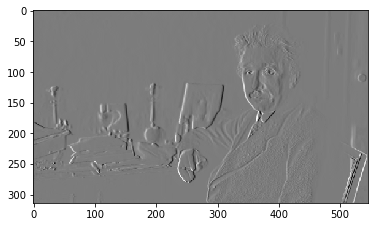

In [71]:
output=convolute(image3, filter1)
image = plt.imshow(output, cmap='gray', interpolation='none')
plt.show()

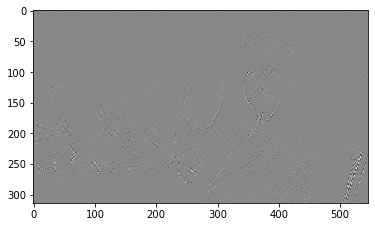

In [72]:
output=convolute(image3, filter)
image = plt.imshow(output, cmap='gray', interpolation='none')
plt.show()